### Data preparation: get the dataset from: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv


### Meaning of each feature:

#### Demographic:
`male` (Categorical): whether or not the patient is male

`age` (Numerical): Age of the patient

#### Behavioral:
`education` (Categorical):    
    1: 0-11 years.
    2: High School Diploma, GED.
    3: Some College, Vocational School.
    4: College (BS, BA) degree or more.

`currentSmoker` (Categorical): whether or not the patient is a current smoker

`cigsPerDay`(Numerical): the number of cigarettes that the person smoked on average in one day

#### Medical (history):
`BPMeds` (Categorical): whether or not the patient was on blood pressure medication

`prevalentStroke` (Categorical): whether or not the patient had previously had a stroke

`prevalentHyp` (Categorical): whether or not the patient was hypertensive 

`diabetes` (Categorical): whether or not the patient had diabetes
    
#### Medical (current):
`totChol` (Numerical): total cholesterol level

`sysBP` (Numerical): systolic blood pressure

`diaBP` (Numerical): diastolic blood pressure

`BMI` (Numerical): Body Mass Index

`heartRate` (Numerical): heart rate

`glucose` (Numerical): glucose level

#### Target:

`TenYearCHD` (Categorical): ten year risk of coronary heart disease (1: Yes, 0: No)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### `EDA`

1. Range of values
2. Missing values
3. Analysis of target variable
4. Size of the dataset
5. Data type of each column
6. Unique count for each column
7. Feature importance (shown in training decision tree classifier)

##### 1. Ranges of values

In [3]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


##### 2. Missing values

In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

##### 3. Analysis of target variable

In [5]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [6]:
df.columns.values

array(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype=object)

##### 4. size of the dataset

In [7]:
df.shape

(4238, 16)

#### 5. data type of each column

In [8]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

#### 6. Check unique count for each column

In [9]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

#### 7. Feature importance analysis: will be shown in training decision tree part below

### Data cleaning

Features filled null values with `mode`:
- education
- cigsPerDay(for currentSmoker=1)
- glucose(for diabetes=1)

Features filled null values with `median`:
- totChol
- BMI
- heartRate

Features filled null values with `0`:
- cigsPerDay(for currentSmoker=0)
- BPMeds
- glucose(for diabetes=0)

In [10]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

df.loc[df['currentSmoker']==1, 'cigsPerDay'] = df.loc[df['currentSmoker']==1, 'cigsPerDay'].fillna(df.loc[df['currentSmoker']==1, 'cigsPerDay'].mode()[0])
df.loc[df['currentSmoker']==0, 'cigsPerDay'] = df.loc[df['currentSmoker']==0, 'cigsPerDay'].fillna(0)


df['BPMeds'] = df['BPMeds'].fillna(0)
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

df.loc[df['diabetes']==1, 'glucose'] = df.loc[df['diabetes']==1, 'glucose'].fillna(df.loc[df['diabetes']==1, 'glucose'].mode()[0])
df.loc[df['diabetes']==0, 'glucose'] = df.loc[df['diabetes']==0, 'glucose'].fillna(0)

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Mapping the categorical columns to meaningful category.

In [11]:
df['male'] = df['male'].map({1:'male', 0:'female'})
df['education'] = df['education'].map({1:'less_than_high_school', 2:'high_school', 3:'some_college_or_vocational_school', 4:'college_or_above'}) 
df['currentSmoker'] = df['currentSmoker'].map({1:'smoker', 0:'non_smoker'})
df['BPMeds'] = df['BPMeds'].map({1:'on_bp_meds', 0:'not_on_bp_meds'})
df['diabetes'] = df['diabetes'].map({1:'diabetic', 0:'non_diabetic'})

Check the statistic information after data cleaning

In [12]:
df.describe()

,age,cigsPerDay,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,9.078339,0.005899,0.310524,236.689476,132.352407,82.893464,25.800205,75.878716,74.575743,0.151958
std,8.572160,11.913780,0.076587,0.462763,44.327427,22.038097,11.910850,4.071041,12.025185,32.819800,0.359023
min,32.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,68.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,77.000000,0.000000
75%,56.000000,20.000000,0.000000,1.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Formatting the columns to become more reabable.

In [13]:
numericals_rename = {'age':'age',
                    'cigsPerDay':'cigarettes_per_day',
                    'totChol':'total_cholesterol',
                    'sysBP':'systolic_blood_pressure',
                    'diaBP':'diasolic_blood_pressure',
                    'BMI':'bmi',
                    'heartRate':'heart_rate',
                    'glucose':'glucose_level'
}

categoricals_rename = {'male':'gender',
               'education':'education_level',
               'currentSmoker':'smoker',
               'BPMeds':'blood_pressure_medication',
               'prevalentStroke':'had_a_stroke',
               'prevalentHyp':'hypertensive',
               'diabetes':'diabetes',
               'TenYearCHD':'10year_chd_risk'}

numericals = list(numericals_rename.values())
categoricals = list(categoricals_rename.values())
categoricals.remove('10year_chd_risk')

df = df.rename(columns=numericals_rename)
df = df.rename(columns=categoricals_rename)
df.head()


,gender,age,education_level,smoker,cigarettes_per_day,blood_pressure_medication,had_a_stroke,hypertensive,diabetes,total_cholesterol,systolic_blood_pressure,diasolic_blood_pressure,bmi,heart_rate,glucose_level,10year_chd_risk
0,male,39,college_or_above,non_smoker,0.0,not_on_bp_meds,0,0,non_diabetic,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,high_school,non_smoker,0.0,not_on_bp_meds,0,0,non_diabetic,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,less_than_high_school,smoker,20.0,not_on_bp_meds,0,0,non_diabetic,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,some_college_or_vocational_school,smoker,30.0,not_on_bp_meds,0,1,non_diabetic,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,some_college_or_vocational_school,smoker,23.0,not_on_bp_meds,0,0,non_diabetic,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Split the Data Before Training

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [14]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train['10year_chd_risk'].values
y_val = df_val['10year_chd_risk'].values
y_test = df_test['10year_chd_risk'].values

del df_train['10year_chd_risk']
del df_val['10year_chd_risk']

print(f'Data for total: {len(df)}, train: {len(df_train)}, val: {len(df_val)}, test: {len(df_test)}')

Data for total: 4238, train: 2542, val: 848, test: 848


In [15]:
train_dict = df_train[categoricals + numericals].to_dict(orient='records')
train_dict[0]

{'gender': 'female',
 'education_level': 'college_or_above',
 'smoker': 'smoker',
 'blood_pressure_medication': 'not_on_bp_meds',
 'had_a_stroke': 0,
 'hypertensive': 0,
 'diabetes': 'non_diabetic',
 'age': 41,
 'cigarettes_per_day': 20.0,
 'total_cholesterol': 243.0,
 'systolic_blood_pressure': 97.0,
 'diasolic_blood_pressure': 63.0,
 'bmi': 22.53,
 'heart_rate': 76.0,
 'glucose_level': 64.0}

In [16]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
dv.get_feature_names_out()

array(['age', 'blood_pressure_medication=not_on_bp_meds',
       'blood_pressure_medication=on_bp_meds', 'bmi',
       'cigarettes_per_day', 'diabetes=diabetic', 'diabetes=non_diabetic',
       'diasolic_blood_pressure', 'education_level=college_or_above',
       'education_level=high_school',
       'education_level=less_than_high_school',
       'education_level=some_college_or_vocational_school',
       'gender=female', 'gender=male', 'glucose_level', 'had_a_stroke',
       'heart_rate', 'hypertensive', 'smoker=non_smoker', 'smoker=smoker',
       'systolic_blood_pressure', 'total_cholesterol'], dtype=object)

In [17]:
X_train.shape

(2542, 22)

### `Model training`, `model selection process` and `parameter tuning` for five models:

1. Logistic Regression
2. SVC
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGBoot Classifier

#### Training Logisitic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, class_weight='balanced', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,1
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
val_dict = df_val[categoricals + numericals].to_dict(orient='records')
X_val = dv.transform(val_dict)
X_val.shape

(848, 22)

### AUC

In [20]:
from sklearn.metrics import roc_auc_score
y_train_pred = model.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_train_pred)

y_pred = model.predict_proba(X_val)[:,1]
auc_val = roc_auc_score(y_val, y_pred)
print(f'ROC AUC train: {auc_train:.3f}, val: {auc_val:.3f}')

ROC AUC train: 0.738, val: 0.710


### Precision and Recall

In [21]:
import numpy as np
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores['precision'] = (df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])).fillna(0)
df_scores['recall'] = (df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])).fillna(0)
df_scores['diff_prec_recall'] = ((df_scores['precision'] - df_scores['recall']) < 0).astype(int)
df_scores.head()

,threshold,tp,fp,fn,tn,precision,recall,diff_prec_recall
0,0.00,131,717,0,0,0.154481,1.0,1
1,0.01,131,717,0,0,0.154481,1.0,1
2,0.02,131,717,0,0,0.154481,1.0,1
3,0.03,131,717,0,0,0.154481,1.0,1
4,0.04,131,717,0,0,0.154481,1.0,1


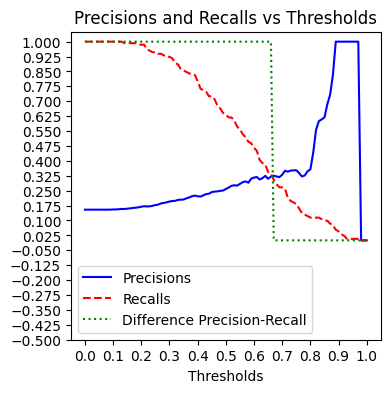

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))

plt.plot(df_scores['threshold'], df_scores['precision'], color='blue', linestyle='solid', label='Precisions')
plt.plot(df_scores['threshold'], df_scores['recall'], color='red', linestyle='dashed', label='Recalls')
plt.plot(df_scores['threshold'], df_scores['diff_prec_recall'], color='green', linestyle='dotted', label='Difference Precision-Recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(-0.5, 1, 21))

plt.xlabel('Thresholds')
plt.title('Precisions and Recalls vs Thresholds')

plt.show()

In [23]:
for i in range(1, len(df_scores)):
    if df_scores.iloc[i - 1]['diff_prec_recall'] != df_scores.iloc[i]['diff_prec_recall']:
        print(f'Precsion and recall curves intersect when threshold=`{df_scores.iloc[i]['threshold']:.3f}`')

Precsion and recall curves intersect when threshold=`0.670`


### F1 score

In [24]:
df_scores['f1_score'] = 2 * df_scores['precision'] * df_scores['recall'] / (df_scores['precision'] + df_scores['recall'])
df_scores['f1_score'].idxmax()

52

In [25]:
df_scores.iloc[df_scores['f1_score'].idxmax()]['threshold']

np.float64(0.52)

F1 reached its maximum when threshold=0.52

#### K-Fold Cross-Validation for LogisticRegression

In [26]:
from sklearn.model_selection import KFold
def k_fold_LogisticRegression_auc(df_train_full, categoricals, numericals, c=1.0):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    kf_train_auc = []
    kf_val_auc = []
    for train_index, val_index in kf.split(df_train_full):
        # prepare train data
        df_train = df_train_full.iloc[train_index]
        train_dict = df_train[categoricals + numericals].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        dv.fit(train_dict)

        # train the model
        X_train = dv.transform(train_dict)
        y_train = df_train['10year_chd_risk'].values
        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, class_weight='balanced', random_state=1)
        model.fit(X_train, y_train)
        
        # make predictions on train data
        y_train_pred = model.predict_proba(X_train)[:, 1]

        # prepare validation data
        df_val = df_train_full.iloc[val_index]
        val_dict = df_val[categoricals + numericals].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_val = df_val['10year_chd_risk'].values

        # make predictions on validation data
        y_val_pred = model.predict_proba(X_val)[:, 1]

        # evaluate the model on train data and store the AUC score in a list
        kf_train_auc.append(round(roc_auc_score(y_train, y_train_pred), 3))
    
        # evaluate the model on validation data and store the AUC score in a list
        kf_val_auc.append(round(roc_auc_score(y_val, y_val_pred), 3))
    
    return kf_train_auc, kf_val_auc

# calculate the standard deviation of the AUC scores
kf_lr_train_auc, kf_lr_val_auc = k_fold_LogisticRegression_auc(df_train_full, categoricals, numericals)
print(f'mean of train LogisticRegression AUC: {np.mean(kf_lr_train_auc)}, mean of val AUC: {np.mean(kf_lr_val_auc)}, std of train AUC: {np.std(kf_lr_train_auc)}, std of val AUC: {np.std(kf_lr_val_auc)}')

mean of train LogisticRegression AUC: 0.7363999999999999, mean of val AUC: 0.7236, std of train AUC: 0.0023323807579381226, std of val AUC: 0.01080000000000001


### Hyperparameter Tuning for LogisticRegression

In [27]:
hyperparameters = np.arange(0.1, 3.1, 0.1)
lr_auc_score_hyperparamters = []

for c in hyperparameters:
    kf_train_auc, kf_val_auc = k_fold_LogisticRegression_auc(df_train_full, categoricals, numericals, c=c)
    lr_auc_score_hyperparamters.append([c, kf_train_auc, kf_val_auc])

In [28]:
df_lr_auc_score_hyperparamters = pd.DataFrame(lr_auc_score_hyperparamters, columns=['C', 'train_auc', 'val_auc'])
df_lr_auc_score_hyperparamters['train_auc'] = df_lr_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_lr_auc_score_hyperparamters['val_auc'] = df_lr_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_lr_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,C,train_auc,val_auc
8,0.9,0.7362,0.7236
9,1.0,0.7364,0.7236
5,0.6,0.7362,0.7236
7,0.8,0.7362,0.7234
10,1.1,0.7362,0.7234


`C=10` achieves the best mean of AUC score.

#### Training SVM

In [29]:
from sklearn.svm import SVC

#### K-Fold Cross-Validation for SVM

In [30]:
def k_fold_SVC_auc(df_train_full, categoricals, numericals, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    kf_train_auc = []
    kf_val_auc = []
    for train_index, val_index in kf.split(df_train_full):
        # prepare train data
        df_train = df_train_full.iloc[train_index]
        train_dict = df_train[categoricals + numericals].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        dv.fit(train_dict)

        # train the model
        X_train = dv.transform(train_dict)
        y_train = df_train['10year_chd_risk'].values
        model = SVC(probability=True, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, class_weight='balanced', max_iter=-1, random_state=1)
        model.fit(X_train, y_train)
        
        # make predictions on train data
        y_train_pred = model.predict_proba(X_train)[:, 1]

        # prepare validation data
        df_val = df_train_full.iloc[val_index]
        val_dict = df_val[categoricals + numericals].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_val = df_val['10year_chd_risk'].values

        # make predictions on validation data
        y_val_pred = model.predict_proba(X_val)[:, 1]

        # evaluate the model on train data and store the AUC score in a list
        kf_train_auc.append(round(roc_auc_score(y_train, y_train_pred), 3))
    
        # evaluate the model on validation data and store the AUC score in a list
        kf_val_auc.append(round(roc_auc_score(y_val, y_val_pred), 3))
    
    return kf_train_auc, kf_val_auc

# calculate the standard deviation of the AUC scores
kf_dt_train_auc, kf_dt_val_auc = k_fold_SVC_auc(df_train_full, categoricals, numericals, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0)
print(f'mean of train SVC AUC: {np.mean(kf_dt_train_auc)}, mean of val AUC: {np.mean(kf_dt_val_auc)}, std of train AUC: {np.std(kf_dt_train_auc)}, std of val AUC: {np.std(kf_dt_val_auc)}')

mean of train SVC AUC: 0.7198, mean of val AUC: 0.7126, std of train AUC: 0.0036551333764994164, std of val AUC: 0.017568153004798175


#### Hyperparameter tuning for SVM

In [31]:
C_range = range(0, 21, 10)
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
degrees = [2, 3, 4] # valid for 'poly' kernel only
gammas = ['scale', 'auto'] # valid for 'rbf', 'poly' and 'sigmoid' kernels only
coef0s = [0.0, 0.5, 1.0] # valid for 'poly' and 'sigmoid' kernels only
svc_auc_score_hyperparamters = []

for c in C_range:
    for k in kernels:
        if k == 'poly':
            for d in degrees:
                for g in gammas:
                    for co in coef0s:
                        kf_train_auc, kf_val_auc = k_fold_SVC_auc(df_train_full, categoricals, numericals, 
                                                    C=c, kernel=k, degree=d, gamma=g, coef0=co)
                        svc_auc_score_hyperparamters.append([c, k, d, g, co, kf_train_auc, kf_val_auc])
        elif k == 'sigmoid':
            for g in gammas:
                for co in coef0s:
                    kf_train_auc, kf_val_auc = k_fold_SVC_auc(df_train_full, categoricals, numericals, 
                                                    C=c, kernel=k, degree=3, gamma=g, coef0=co)
                    svc_auc_score_hyperparamters.append([c, k, 3, g, co, kf_train_auc, kf_val_auc])
        elif k == 'rbf':
            for g in gammas:
                kf_train_auc, kf_val_auc = k_fold_SVC_auc(df_train_full, categoricals, numericals, 
                                                    C=c, kernel=k, degree=3, gamma=g, coef0=0.0)
                svc_auc_score_hyperparamters.append([c, k, 3, g, 0.0, kf_train_auc, kf_val_auc])
        else:  # linear kernel
            kf_train_auc, kf_val_auc = k_fold_SVC_auc(df_train_full, categoricals, numericals, 
                                                    C=c, kernel=k, degree=3, gamma='scale', coef0=0.0)
            svc_auc_score_hyperparamters.append([c, k, 3, 'scale', 0.0, kf_train_auc, kf_val_auc])
        print(f'Completed C={c}, kernel={k}')

Completed C=0, kernel=rbf
Completed C=0, kernel=linear
Completed C=0, kernel=poly
Completed C=0, kernel=sigmoid
Completed C=10, kernel=rbf
Completed C=10, kernel=linear
Completed C=10, kernel=poly
Completed C=10, kernel=sigmoid
Completed C=20, kernel=rbf
Completed C=20, kernel=linear
Completed C=20, kernel=poly
Completed C=20, kernel=sigmoid


In [32]:
df_svc_auc_score_hyperparamters = pd.DataFrame(svc_auc_score_hyperparamters, columns=['C', 'kernel', 'degree', 'gamma', 'coef0', 'train_auc', 'val_auc'])
df_svc_auc_score_hyperparamters['train_auc'] = df_svc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_svc_auc_score_hyperparamters['val_auc'] = df_svc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_svc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,C,kernel,degree,gamma,coef0,train_auc,val_auc
0,0,rbf,3,scale,0.0,0.7198,0.7126
1,0,rbf,3,auto,0.0,0.7198,0.7126
2,0,linear,3,scale,0.0,0.7198,0.7126
3,0,poly,2,scale,0.0,0.7198,0.7126
4,0,poly,2,scale,0.5,0.7198,0.7126


#### Training DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
dt = DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=1)
dt.fit(X_train, y_train)
print(export_text(dt, feature_names=dv.get_feature_names_out()))

df_feature_importance = pd.DataFrame({
    'feature': dv.get_feature_names_out(),
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False)
df_feature_importance

|--- age <= 46.50
|   |--- cigarettes_per_day <= 9.50
|   |   |--- class: 0
|   |--- cigarettes_per_day >  9.50
|   |   |--- class: 0
|--- age >  46.50
|   |--- systolic_blood_pressure <= 144.25
|   |   |--- class: 1
|   |--- systolic_blood_pressure >  144.25
|   |   |--- class: 1



,feature,importance
0,age,0.590328
20,systolic_blood_pressure,0.250212
4,cigarettes_per_day,0.159460
1,blood_pressure_medication=not_on_bp_meds,0.000000
3,bmi,0.000000
2,blood_pressure_medication=on_bp_meds,0.000000
5,diabetes=diabetic,0.000000
6,diabetes=non_diabetic,0.000000
8,education_level=college_or_above,0.000000
7,diasolic_blood_pressure,0.000000


#### K-Fold Cross-Validation for DecisionTreeClassifier

In [34]:
def k_fold_DecisionTreeClassifier_auc(df_train_full, categoricals, numericals, maxDepth=10, minSamplesLeaf=5):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    kf_train_auc = []
    kf_val_auc = []
    for train_index, val_index in kf.split(df_train_full):
        # prepare train data
        df_train = df_train_full.iloc[train_index]
        train_dict = df_train[categoricals + numericals].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        dv.fit(train_dict)

        # train the model
        X_train = dv.transform(train_dict)
        y_train = df_train['10year_chd_risk'].values
        model = DecisionTreeClassifier(max_depth = maxDepth, min_samples_leaf = minSamplesLeaf, class_weight='balanced', random_state=1)
        model.fit(X_train, y_train)
        
        # make predictions on train data
        y_train_pred = model.predict_proba(X_train)[:, 1]

        # prepare validation data
        df_val = df_train_full.iloc[val_index]
        val_dict = df_val[categoricals + numericals].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_val = df_val['10year_chd_risk'].values

        # make predictions on validation data
        y_val_pred = model.predict_proba(X_val)[:, 1]

        # evaluate the model on train data and store the AUC score in a list
        kf_train_auc.append(round(roc_auc_score(y_train, y_train_pred), 3))
    
        # evaluate the model on validation data and store the AUC score in a list
        kf_val_auc.append(round(roc_auc_score(y_val, y_val_pred), 3))
    
    return kf_train_auc, kf_val_auc

# calculate the standard deviation of the AUC scores
kf_dt_train_auc, kf_dt_val_auc = k_fold_DecisionTreeClassifier_auc(df_train_full, categoricals, numericals)
print(f'mean of train DecisionTreeClassifier AUC: {np.mean(kf_dt_train_auc)}, mean of val AUC: {np.mean(kf_dt_val_auc)}, std of train AUC: {np.std(kf_dt_train_auc)}, std of val AUC: {np.std(kf_dt_val_auc)}')

mean of train DecisionTreeClassifier AUC: 0.9168000000000001, mean of val AUC: 0.5976, std of train AUC: 0.00800999375780032, std of val AUC: 0.033036949011674775


#### Hyperparameter tuning for DecisionTreeClassifier

In [35]:
max_depth_range=range(1, 101, 10)
min_samples_leaf_range = range(1, 11, 2)
dtc_auc_score_hyperparamters = []

for maxD in max_depth_range:
    for minS in min_samples_leaf_range:
        kf_train_auc, kf_val_auc = k_fold_DecisionTreeClassifier_auc(df_train_full, categoricals, numericals, maxDepth=maxD, minSamplesLeaf=minS)
        dtc_auc_score_hyperparamters.append([maxD, minS, kf_train_auc, kf_val_auc])
        print(f'Completed max_depth={maxD}, min_samples_leaf={minS}')

Completed max_depth=1, min_samples_leaf=1
Completed max_depth=1, min_samples_leaf=3
Completed max_depth=1, min_samples_leaf=5
Completed max_depth=1, min_samples_leaf=7
Completed max_depth=1, min_samples_leaf=9
Completed max_depth=11, min_samples_leaf=1
Completed max_depth=11, min_samples_leaf=3
Completed max_depth=11, min_samples_leaf=5
Completed max_depth=11, min_samples_leaf=7
Completed max_depth=11, min_samples_leaf=9
Completed max_depth=21, min_samples_leaf=1
Completed max_depth=21, min_samples_leaf=3
Completed max_depth=21, min_samples_leaf=5
Completed max_depth=21, min_samples_leaf=7
Completed max_depth=21, min_samples_leaf=9
Completed max_depth=31, min_samples_leaf=1
Completed max_depth=31, min_samples_leaf=3
Completed max_depth=31, min_samples_leaf=5
Completed max_depth=31, min_samples_leaf=7
Completed max_depth=31, min_samples_leaf=9
Completed max_depth=41, min_samples_leaf=1
Completed max_depth=41, min_samples_leaf=3
Completed max_depth=41, min_samples_leaf=5
Completed max_de

In [36]:
df_dtc_auc_score_hyperparamters = pd.DataFrame(dtc_auc_score_hyperparamters, columns=['max_depth', 'min_samples_leaf', 'train_auc', 'val_auc'])
df_dtc_auc_score_hyperparamters['train_auc'] = df_dtc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_dtc_auc_score_hyperparamters['val_auc'] = df_dtc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_dtc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,max_depth,min_samples_leaf,train_auc,val_auc
0,1,1,0.6322,0.626
1,1,3,0.6322,0.626
2,1,5,0.6322,0.626
3,1,7,0.6322,0.626
4,1,9,0.6322,0.626


#### Training RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestClassifier

#### K-Fold Cross-Validation for RandomForestClassifier

In [38]:
def k_fold_RandomForestClassifier_auc(df_train_full, categoricals, numericals, nEstimators=100, maxDepth=10, minSamplesLeaf=5):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    kf_train_auc = []
    kf_val_auc = []
    for train_index, val_index in kf.split(df_train_full):
        # prepare train data
        df_train = df_train_full.iloc[train_index]
        train_dict = df_train[categoricals + numericals].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        dv.fit(train_dict)

        # train the model
        X_train = dv.transform(train_dict)
        y_train = df_train['10year_chd_risk'].values
        model = RandomForestClassifier(n_estimators=nEstimators, n_jobs=-1, max_depth=maxDepth, min_samples_leaf=minSamplesLeaf, class_weight='balanced', random_state=1)
        model.fit(X_train, y_train)
        
        # make predictions on train data
        y_train_pred = model.predict_proba(X_train)[:, 1]

        # prepare validation data
        df_val = df_train_full.iloc[val_index]
        val_dict = df_val[categoricals + numericals].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_val = df_val['10year_chd_risk'].values

        # make predictions on validation data
        y_val_pred = model.predict_proba(X_val)[:, 1]

        # evaluate the model on train data and store the AUC score in a list
        kf_train_auc.append(round(roc_auc_score(y_train, y_train_pred), 3))
    
        # evaluate the model on validation data and store the AUC score in a list
        kf_val_auc.append(round(roc_auc_score(y_val, y_val_pred), 3))
    
    return kf_train_auc, kf_val_auc

# calculate the standard deviation of the AUC scores
kf_dt_train_auc, kf_dt_val_auc = k_fold_RandomForestClassifier_auc(df_train_full, categoricals, numericals)
print(f'mean of train RandomForestClassifier AUC: {np.mean(kf_dt_train_auc)}, mean of val AUC: {np.mean(kf_dt_val_auc)}, std of train AUC: {np.std(kf_dt_train_auc)}, std of val AUC: {np.std(kf_dt_val_auc)}')

mean of train RandomForestClassifier AUC: 0.958, mean of val AUC: 0.7061999999999999, std of train AUC: 0.004381780460041332, std of val AUC: 0.006013318551349169


#### Hyperparameter tuning for RandomForestClassifier

In [39]:
n_estimators_range = range(1, 32, 5)
max_depth_range = range(1, 10, 1)
min_samples_leaf_range = range(1, 22, 5)
rfc_auc_score_hyperparamters = []

for nEs in n_estimators_range:
    for maxD in max_depth_range:
        for minS in min_samples_leaf_range:
            kf_train_auc, kf_val_auc = k_fold_RandomForestClassifier_auc(df_train_full, categoricals, numericals, nEstimators= nEs, maxDepth=maxD, minSamplesLeaf=minS)
            rfc_auc_score_hyperparamters.append([nEs, maxD, minS, kf_train_auc, kf_val_auc])
    print(f'Completed n_estimators={nEs}, max_depth={maxD}, min_samples_leaf={minS}')

Completed n_estimators=1, max_depth=9, min_samples_leaf=21
Completed n_estimators=6, max_depth=9, min_samples_leaf=21
Completed n_estimators=11, max_depth=9, min_samples_leaf=21
Completed n_estimators=16, max_depth=9, min_samples_leaf=21
Completed n_estimators=21, max_depth=9, min_samples_leaf=21
Completed n_estimators=26, max_depth=9, min_samples_leaf=21
Completed n_estimators=31, max_depth=9, min_samples_leaf=21


In [40]:
df_rfc_auc_score_hyperparamters = pd.DataFrame(rfc_auc_score_hyperparamters, columns=['n_estimators', 'max_depth', 'min_samples_leaf', 'train_auc', 'val_auc'])
df_rfc_auc_score_hyperparamters['train_auc'] = df_rfc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_rfc_auc_score_hyperparamters['val_auc'] = df_rfc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_rfc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,n_estimators,max_depth,min_samples_leaf,train_auc,val_auc
303,31,7,16,0.8336,0.7118
258,26,7,16,0.8342,0.7110
149,16,3,21,0.7376,0.7108
249,26,5,21,0.7820,0.7098
204,21,5,21,0.7802,0.7096


#### Training XGBClassifier model

In [41]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    reg_lambda=1.0,
    random_state=1,
    n_jobs=-1,
    n_estimators=100,
    scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum()
)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]
auc_val = roc_auc_score(y_val, y_pred)
print(f'ROC AUC train: {auc_train:.3f}, val: {auc_val:.3f}')

ROC AUC train: 0.738, val: 0.641


#### K-Fold Cross-Validation for XGBoostClassifier

In [42]:
def k_fold_XGBoostClassifier_auc(df_train_full, categoricals, numericals, learningRate=0.1, maxDepth=6, regLambda=1.0):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    kf_train_auc = []
    kf_val_auc = []
    for train_index, val_index in kf.split(df_train_full):
        # prepare train data
        df_train = df_train_full.iloc[train_index]
        train_dict = df_train[categoricals + numericals].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        dv.fit(train_dict)

        # train the model
        X_train = dv.transform(train_dict)
        y_train = df_train['10year_chd_risk'].values
        model = XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            learning_rate=learningRate,
            max_depth=maxDepth,
            min_child_weight=1,
            gamma=0,
            reg_lambda=regLambda,
            random_state=1,
            n_jobs=-1,
            n_estimators=100,
            scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum()
        )
        model.fit(X_train, y_train)
        
        # make predictions on train data
        y_train_pred = model.predict_proba(X_train)[:, 1]

        # prepare validation data
        df_val = df_train_full.iloc[val_index]
        val_dict = df_val[categoricals + numericals].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_val = df_val['10year_chd_risk'].values

        # make predictions on validation data
        y_val_pred = model.predict_proba(X_val)[:, 1]

        # evaluate the model on train data and store the AUC score in a list
        kf_train_auc.append(round(roc_auc_score(y_train, y_train_pred), 3))
    
        # evaluate the model on validation data and store the AUC score in a list
        kf_val_auc.append(round(roc_auc_score(y_val, y_val_pred), 3))
    
    return kf_train_auc, kf_val_auc

# calculate the standard deviation of the AUC scores
kf_dt_train_auc, kf_dt_val_auc = k_fold_XGBoostClassifier_auc(df_train_full, categoricals, numericals)
print(f'mean of train XGBoostClassifier AUC: {np.mean(kf_dt_train_auc)}, mean of val AUC: {np.mean(kf_dt_val_auc)}, std of train AUC: {np.std(kf_dt_train_auc)}, std of val AUC: {np.std(kf_dt_val_auc)}')

mean of train XGBoostClassifier AUC: 0.9927999999999999, mean of val AUC: 0.6608, std of train AUC: 0.0024000000000000024, std of val AUC: 0.018475930287809614


#### Hyperparameter tuning for XGBoostClassifier

In [43]:
learning_rate_range = np.arange(0.1, 0.6, 0.1)
max_depth_range = range(1, 7, 1)
reg_lambda_range = np.arange(0.5, 3.1, 0.5)
xgc_auc_score_hyperparamters = []

for eta in learning_rate_range:
    for maxD in max_depth_range:
        for regL in reg_lambda_range:
            kf_train_auc, kf_val_auc = k_fold_XGBoostClassifier_auc(df_train_full, categoricals, numericals, learningRate=eta, maxDepth=maxD, regLambda=regL)
            xgc_auc_score_hyperparamters.append([eta, maxD, regL, kf_train_auc, kf_val_auc])
    print(f'Completed learning_rate={eta}, max_depth={maxD}, reg_lambda={regL}')

Completed learning_rate=0.1, max_depth=6, reg_lambda=3.0
Completed learning_rate=0.2, max_depth=6, reg_lambda=3.0
Completed learning_rate=0.30000000000000004, max_depth=6, reg_lambda=3.0
Completed learning_rate=0.4, max_depth=6, reg_lambda=3.0
Completed learning_rate=0.5, max_depth=6, reg_lambda=3.0


In [44]:
df_xgc_auc_score_hyperparamters = pd.DataFrame(xgc_auc_score_hyperparamters, columns=['learning_rate', 'max_depth', 'reg_lambda', 'train_auc', 'val_auc'])
df_xgc_auc_score_hyperparamters['train_auc'] = df_xgc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_xgc_auc_score_hyperparamters['val_auc'] = df_xgc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_xgc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,learning_rate,max_depth,reg_lambda,train_auc,val_auc
5,0.1,1,3.0,0.7474,0.7114
3,0.1,1,2.0,0.7478,0.7112
2,0.1,1,1.5,0.7480,0.7112
1,0.1,1,1.0,0.7482,0.7112
4,0.1,1,2.5,0.7478,0.7110


#### AUC summary for all the five models

In [60]:
print('Logistic Regression:')
display(df_lr_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('SVM:')
display(df_svc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('Decision Tree Classifier:')
display(df_dtc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('Random Forest Classifier:')
display(df_rfc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('XGBoost Classifier:')
display(df_xgc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

Logistic Regression:


,C,train_auc,val_auc
8,0.9,0.7362,0.7236


SVM:


,C,kernel,degree,gamma,coef0,train_auc,val_auc
0,0,rbf,3,scale,0.0,0.7198,0.7126


Decision Tree Classifier:


,max_depth,min_samples_leaf,train_auc,val_auc
0,1,1,0.6322,0.626


Random Forest Classifier:


,n_estimators,max_depth,min_samples_leaf,train_auc,val_auc
303,31,7,16,0.8336,0.7118


XGBoost Classifier:


,learning_rate,max_depth,reg_lambda,train_auc,val_auc
5,0.1,1,3.0,0.7474,0.7114


### Logisitic Regression with `C=0.9` achieves the best of AUC score within validation dataset. Let's train it with full training data, save it, and deploy it.

#### Save model for deployment

In [46]:
def train(df, y, C=1.0):
    train_dict = df[categoricals + numericals].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, class_weight='balanced', random_state=1)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    val_dict = df[categoricals + numericals].to_dict(orient='records')
    
    X = dv.transform(val_dict)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [47]:
df_test.columns

Index(['gender', 'age', 'education_level', 'smoker', 'cigarettes_per_day',
       'blood_pressure_medication', 'had_a_stroke', 'hypertensive', 'diabetes',
       'total_cholesterol', 'systolic_blood_pressure',
       'diasolic_blood_pressure', 'bmi', 'heart_rate', 'glucose_level',
       '10year_chd_risk'],
      dtype='object')

In [63]:
y_train = df_train_full['10year_chd_risk'].values
y_test = df_test['10year_chd_risk'].values

dv, model = train(df_train_full, y_train, C=0.9)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %f' % auc)

auc = 0.722475


In [64]:
patient = {
    'gender': 'female',
    'education_level': 'college_or_above',
    'smoker': 'smoker',
    'blood_pressure_medication': 'not_on_bp_meds',
    'had_a_stroke': 1,
    'hypertensive': 1,
    'diabetes': 'non_diabetic',
    'age': 91,
    'cigarettes_per_day': 20.0,
    'total_cholesterol': 243.0,
    'systolic_blood_pressure': 97.0,
    'diasolic_blood_pressure': 63.0,
    'bmi': 22.53,
    'heart_rate': 76.0,
    'glucose_level': 64.0
}

In [65]:
df_patient = pd.DataFrame([patient])
y_pred = predict(df_patient, dv, model)
y_pred[0]

np.float64(0.9329324872646497)

#### Save the model to pickle file

In [51]:
import pickle

with open('chd_risk_model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)


Restart the Kernel and load the model to make sure the saved model is loaded correctly

In [66]:
import pandas as pd
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [67]:
with open('chd_risk_model.bin', 'rb') as f_in:
    (dv, model) = pickle.load(f_in)

Make prediction based on below input and the saved model

In [68]:
patient = {
    'gender': 'female',
    'education_level': 'college_or_above',
    'smoker': 'smoker',
    'blood_pressure_medication': 'not_on_bp_meds',
    'had_a_stroke': 1,
    'hypertensive': 1,
    'diabetes': 'non_diabetic',
    'age': 91,
    'cigarettes_per_day': 20.0,
    'total_cholesterol': 243.0,
    'systolic_blood_pressure': 97.0,
    'diasolic_blood_pressure': 63.0,
    'bmi': 22.53,
    'heart_rate': 76.0,
    'glucose_level': 64.0
}

In [69]:
X = dv.transform(patient)
y_pred = model.predict_proba(X)[:,1]
y_pred

array([0.94261787])

#### Use Scikit-Learn Pipelines to combined the `dv` and `model` objects into one

In [71]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    DictVectorizer(),
    LogisticRegression(solver='liblinear', C=0.9, max_iter=1000, class_weight='balanced', random_state=1)
)


train_dict = df_train_full[categoricals + numericals].to_dict(orient='records')
pipeline.fit(train_dict, y_train)

,steps,"[('dictvectorizer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True
,penalty,'l2'
,dual,False
,tol,0.0001


Make prediction with pipeline is simpler than before

In [72]:
pipeline.predict_proba(patient)[0, 1]

np.float64(0.9329324872646497)

### `Exporting notebook to a separate script`

`train_generated_from_notebook.py` will be generate. The `train.py` in my GitHub is the script file modified from `train_generated_from_notebook.py` as taught in workshop of ML Zoomcamp 2025

In [ ]:
!jupyter nbconvert --to=script main.ipynb
!mv main.py train_generated_from_notebook.py

##### Print all the possible value in categorical columns and the statisticical information in numerical columns and use it to convert to pydantic class for input validation with FastAPI.

In [73]:
for c in categoricals:
    print(df[c].value_counts())
    print()

for n in numericals:
    print(df[n].describe())
    print()

gender
female    2419
male      1819
Name: count, dtype: int64

education_level
less_than_high_school                1825
high_school                          1253
some_college_or_vocational_school     687
college_or_above                      473
Name: count, dtype: int64

smoker
non_smoker    2144
smoker        2094
Name: count, dtype: int64

blood_pressure_medication
not_on_bp_meds    4114
on_bp_meds         124
Name: count, dtype: int64

had_a_stroke
0    4213
1      25
Name: count, dtype: int64

hypertensive
0    2922
1    1316
Name: count, dtype: int64

diabetes
non_diabetic    4129
diabetic         109
Name: count, dtype: int64

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

count    4238.000000
mean        9.078339
std        11.913780
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.